## Programming for Data Analysis Project



** Introduction**

The weather, the obsession of all Irish adults. From a conversation starter to the dreaded threat of weddings and summer bar-be-cues.

Meteireann has the dubious task of trying to give accurate and timely forecasts for the nation, while more often than not being the butt of the joke due to each individual taking a wholistic forecast as a personal gaurantee of weather certainty.

The following project is going to analyse the percipitation (Rain Fall) from the Cork Airport weather station in County Cork under the following headings;

- Date
- Percipitation Amount (mm)
- Maximum Air Temperature (C)
- Minimum Air Temperature (C)
- Mean Wind Speed (Knot)
- Wind Direction at Max 10 min Mean (deg)
- Mean CBL Pressure (hpa)


** Aim**

The aim of this project is to explore the creation of an accurate localised weather predictor by investigating if known historical weather characterisitics have a dependency and relationship with each other.


** Method **

By analysing historical weather data and its associated characteristics in relation to percipitation amount it is proposed that if the correct weather characteristics and data for the local area are entered into the model i.e. Ballincollig, County Cork, an accurate determination if percipition (rain) is forecast for your locality will be determined.

As the Cork Airport weather station is the closest weather station with enough variable data to create a model it was used to gather historical data points.

For the purpose of this project random data will be generated using numpy.random to generate a data sets to mimick the characteristics of the variables taken from the Cork Airport weather station. i.e.

- Date
- Percipitation Amount (mm)
- Maximum Air Temperature (C)
- Minimum Air Temperature (C)
- Mean Wind Speed (Knot)
- Wind Direction at Max 10 min Mean (deg)
- Mean CBL Pressure (hpa)


In [76]:
import pandas as pd

In [77]:
import numpy as np

In [78]:
import matplotlib.pyplot as plt

In [79]:
from scipy import stats

In [80]:
from scipy.stats import kurtosis, skew

**Definition of the Data Frame**

To provide clarity when further analysis is conducted and to be able to differentiate between the original and random data sets we will define the original Cork airport data frame as "CorkAirportData"

In [81]:
CorkAirportData = pd.read_csv('C://Users//Shane//Desktop//GMIT//meteireann//CorkAirportDataone.txt')

In [82]:
CorkAirportData

,Date,MaxTemp,MinTemp,Rain mm,Pressure cbl Hpa,WindSpeed Knots,Wind Direction deg
0,31-Oct-17,12.3,10.0,0.0,1003.7,9.2,220
1,01-Nov-17,12.6,7.8,0.0,998.5,3.8,180
2,02-Nov-17,12.8,7.8,0.2,997.4,4.1,340
3,03-Nov-17,10.0,7.3,0.0,992.5,3.1,260
4,04-Nov-17,9.4,3.4,2.4,991.3,10.2,300
5,05-Nov-17,9.8,4.0,1.1,1000.5,7.8,320
6,06-Nov-17,11.5,5.6,10.6,997.8,12.5,200
7,07-Nov-17,9.7,3.0,2.5,997.2,9.1,330
8,08-Nov-17,10.5,4.0,0.1,1005.2,5.9,300
9,09-Nov-17,12.2,8.7,0.8,1006.8,9.9,310


** Summary Descriptive Statistics for the Data Frame**

To generate random data to match the characteristics of the cork airport weather data I first need to determine the descriptive statistics for the data set. To generate a randm data set that closely aligns to the cork airport data set I am going to calculate the following statistical parameters.

- Mean
- Standard Deviation (std)
- Skewness
- Kurtosis

In [83]:
"Mean Data"
CorkAirportData.mean()

MaxTemp                13.301366
MinTemp                 6.671858
Rain mm                 2.960929
Pressure cbl Hpa      995.120765
WindSpeed Knots         9.370219
Wind Direction deg    228.415301
dtype: float64

In [84]:
CorkAirportData.std()

MaxTemp                5.517347
MinTemp                4.669434
Rain mm                5.256508
Pressure cbl Hpa      11.382705
WindSpeed Knots        3.611673
Wind Direction deg    89.321351
dtype: float64

In [85]:
CorkAirportData.skew()

MaxTemp               0.175570
MinTemp              -0.028819
Rain mm               2.597616
Pressure cbl Hpa     -0.594056
WindSpeed Knots       0.694846
Wind Direction deg   -0.609418
dtype: float64

In [86]:
CorkAirportData.kurtosis()

MaxTemp              -0.538643
MinTemp              -0.809285
Rain mm               7.324231
Pressure cbl Hpa      0.033814
WindSpeed Knots       0.133744
Wind Direction deg   -0.338251
dtype: float64

In [87]:
CorkAirportData.min()

Date                  01-Apr-18
MaxTemp                    -1.8
MinTemp                      -7
Rain mm                       0
Pressure cbl Hpa          963.3
WindSpeed Knots             2.8
Wind Direction deg            0
dtype: object

In [88]:
CorkAirportData.max()

Date                  31-Oct-18
MaxTemp                    26.7
MinTemp                    16.5
Rain mm                      31
Pressure cbl Hpa         1020.9
WindSpeed Knots            23.8
Wind Direction deg          360
dtype: object

In [89]:
CorkAirportData.median()

MaxTemp                12.60
MinTemp                 6.75
Rain mm                 0.40
Pressure cbl Hpa      996.85
WindSpeed Knots         8.90
Wind Direction deg    230.00
dtype: float64

** Defining Each Column Within the Cork Airport Data Frame**

To compare the data and graphs of the Cork airport data and the randomly generated data I will define each column within the data frame so it can be graphed. I will use the iloc function to define each column of data so they can be plotted on as subplots on bar chart graphs.

In [90]:
plt.subplot(2,3,1)
MaxTemp=CorkAirportData.iloc[0:365,1]
plt.hist(MaxTemp)
plt.title("MaxTemp")
plt.xlabel("Qty")
plt.ylabel("Temperature")

Text(0,0.5,'Temperature')

In [91]:
plt.subplot(2,3,2)
MinTemp=CorkAirportData.iloc[0:365,2]
plt.hist(MinTemp)
plt.title("MinTemp")
plt.xlabel("Qty")
plt.ylabel("Temperature")

Text(0,0.5,'Temperature')

In [92]:
plt.subplot(2,3,3)
Rain=CorkAirportData.iloc[0:365,3]
plt.hist(Rain)
plt.title("Percipitation (mm)")
plt.xlabel("Qty")
plt.ylabel("Volume")

Text(0,0.5,'Volume')

In [93]:
plt.subplot(2,3,4)
Pressure=CorkAirportData.iloc[0:365,4]
plt.hist(Pressure)
plt.title("Pressure (Hpa)")
plt.xlabel("Qty")
plt.ylabel("Pressure")

Text(0,0.5,'Pressure')

In [94]:
plt.subplot(2,3,5)
WindSpeed=CorkAirportData.iloc[0:365,5]
plt.hist(WindSpeed)
plt.title("Wind Speed (knots)")
plt.xlabel("Qty")
plt.ylabel("Speed Knots")

Text(0,0.5,'Speed Knots')

In [95]:
plt.subplot(2,3,6)
WindDirection=CorkAirportData.iloc[0:365,6]
plt.hist(WindDirection)
plt.title("Wind Direction (deg)")
plt.xlabel("Qty")
plt.ylabel("Wind Direction (deg)")

Text(0,0.5,'Wind Direction (deg)')

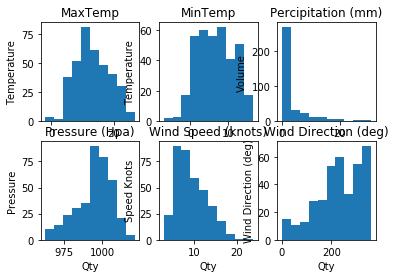

In [96]:
plt.show()

** Generatation of Random Data to Simulation the Cork Airport Weather Data**

To analyse the data and to determine if there is any dependancies between the variables and rainfall, random data will be generated who's distributions approximate the real world weather data from Cork Airport. Below we detail the distributions assigned to each of the weather variables selected and a brief justification for selecting the specific distribution for each variable.
    
       Weather Variable         Designation        Selected Distribution
     - Max Temperature          RandMaxTemp        Normal Distribution
     - Min Temperature          RandMinTemp        Normal Distribution
     - Percipitation            RandRain           Gamma Distribution
     - Pressure                 RandPressure       Gumbel Distribution
     - Wind Speed               RandWindSpeed      Gumbel Distribution
     - Wind Direction           RandWindDir        Gumbel Distribtion
     
As the original data visually illustrated the Max and Min temperatures displayed an approximation to the normal distribution the random data for Max and Min temperatures will be generated following the normal distribution.

On review of literature it was discovered a number of distributions can be used to model percipitation amounts. As the original data set was right skewed the Gamma distribution was selected to model the random data for percipitation (Rain Fall)

All other variables display extreme values and for this reason the Gumbel distributions were selected for them.
     

**RandMaxTemp**

In [97]:
RandMaxTemp=np.random.normal(13.301366,5.517347,365)
plt.subplot(2,3,1)
plt.hist(RandMaxTemp)
plt.title("Daily Max Temperature")
plt.xlabel("Qty")
plt.ylabel("Temperature")

Text(0,0.5,'Temperature')

**RandMinTemp**

In [98]:
RandMinTemp=np.random.normal(6.671858,4.669434,365)
plt.subplot(2,3,2)
plt.hist(RandMinTemp)
plt.title("Daily Min Temperature")
plt.xlabel("Qty")
plt.ylabel("Temperature")

Text(0,0.5,'Temperature')

**RandRain**

In [99]:
RandRain = np.random.gamma(0.4, 5.256508, 365)
plt.subplot(2,3,3)
plt.hist(RandRain)
plt.title("Daily Rain Fall")
plt.xlabel("Amount")
plt.ylabel("Rain mm")

Text(0,0.5,'Rain mm')

**RandPressure**

In [100]:
RandPressure = np.random.gumbel(996.85, 11.382705, 365)
plt.subplot(2,3,4)
plt.hist(RandPressure)
plt.title("Daily Pressure")
plt.xlabel("Pressure")
plt.ylabel("Pressure Frequency Hpa")

Text(0,0.5,'Pressure Frequency Hpa')

**RandWindSpeed**

In [101]:
RandWindSpeed = np.random.gumbel(8.9, 3.611673, 365)
plt.subplot(2,3,5)
plt.hist(RandWindSpeed)
plt.title("Daily Wind Speed")
plt.xlabel("Wind Speed")
plt.ylabel("Wind Speed Frequency Knots")

Text(0,0.5,'Wind Speed Frequency Knots')

**RandWindDir**

In [102]:
RandWindDir = np.random.gumbel(230, 89.321351, 365)
plt.subplot(2,3,6)
plt.hist(RandWindDir)
plt.title("Daily Wind Direction")
plt.xlabel("Wind Direction")
plt.ylabel("Wind Direction Degs")

Text(0,0.5,'Wind Direction Degs')

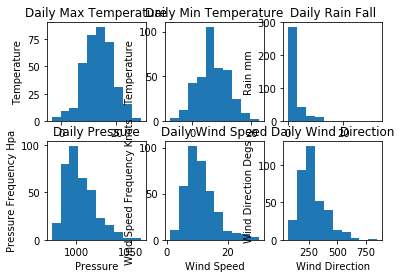

In [103]:
plt.show()

In [104]:
## Including a range of integers for use in the scatter plots for an "X" value
DayNumber = range(1,366)

**Random Data, Data Frame Creation**

Now that we have created random data to simulate the real world weather data from Cork airport, we will create a data from to store our results.

I will define and name the data frame RanWeatherData to differenciate from the original data set from Cork airport.

In [105]:
RanWeatherData = pd.DataFrame({"Day Number": DayNumber,"Random Max Temp":RandMaxTemp, "Random Min Temp": RandMinTemp, "Random Rain": RandRain, "Random Pressure": RandPressure, "Random Wind Speed": RandWindSpeed, "Random Wind Direction": RandWindDir})

In [106]:
RanWeatherData

,Day Number,Random Max Temp,Random Min Temp,Random Pressure,Random Rain,Random Wind Direction,Random Wind Speed
0,1,17.975778,0.397632,1002.640627,0.369396,149.363663,8.301087
1,2,14.232412,6.486686,989.913224,0.584717,581.700805,5.743892
2,3,18.704578,8.204304,1005.902317,2.112722,423.001286,5.975953
3,4,18.967325,6.617632,1010.906793,0.468551,172.804679,22.118091
4,5,16.262802,6.014919,997.484816,11.508790,313.213154,5.614479
5,6,11.635953,3.304826,1006.210801,4.072095,257.316229,4.837762
6,7,22.803874,2.039253,1012.715914,7.220116,317.531904,10.886260
7,8,13.081555,-0.107058,992.604123,0.001424,92.824898,17.807894
8,9,14.308154,6.184073,993.545900,6.485894,176.006772,8.652424
9,10,20.913829,-7.703611,1006.595613,3.615752,388.849854,12.019254


** Comparison of Original Data and Random Generated Data** 

To compare and contrast the original Cork Airport weather data and the random generated data, I will generate box plots to compare and contrast the data sets. The box plot will allow a standardized way of displaying the distribution of the data based on five descriptive statistics, namely minimum value, first quartile, median value, third quartile, and maximum value. 

In [107]:
plt.subplot(1,2,1)
MaxTempBoxPlot=[RandMaxTemp, MaxTemp]
plt.title("Max Temperature Comparison")
plt.boxplot(MaxTempBoxPlot)
plt.xlabel('Data Points')
plt.ylabel('Temperature')
plt.xticks([1, 2], ['RandMaxTemp', 'MaxTemp'])

([<matplotlib.axis.XTick at 0x211b9c83e80>,
 <a list of 2 Text xticklabel objects>)

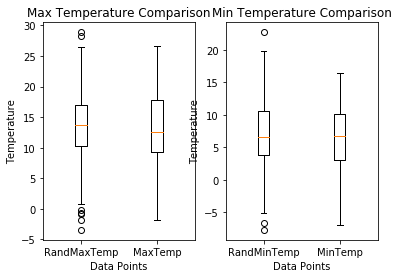

In [108]:
plt.subplot(1,2,2)
MinTempBoxPlot=[RandMinTemp, MinTemp]
plt.title("Min Temperature Comparison")
plt.boxplot(MinTempBoxPlot)
plt.xlabel('Data Points')
plt.ylabel('Temperature')
plt.xticks([1, 2], ['RandMinTemp', 'MinTemp'])
plt.show()

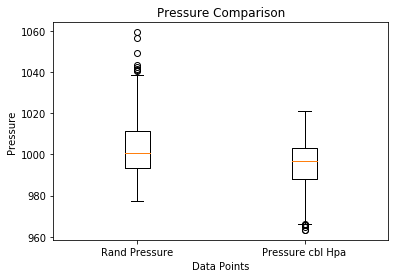

In [109]:
PressureBoxPlot=[RandPressure, Pressure]
plt.title("Pressure Comparison")
plt.boxplot(PressureBoxPlot)
plt.xlabel('Data Points')
plt.ylabel('Pressure')
plt.xticks([1, 2], ['Rand Pressure','Pressure cbl Hpa'])
plt.show()

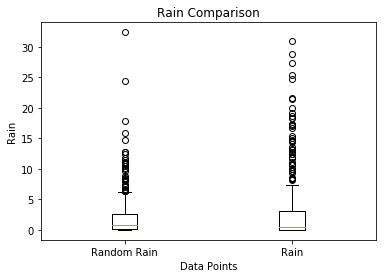

In [110]:
RainBoxPlot=[RandRain, Rain]
plt.title("Rain Comparison")
plt.boxplot(RainBoxPlot)
plt.xlabel('Data Points')
plt.ylabel('Rain')
plt.xticks([1, 2], ['Random Rain','Rain'])
plt.show()

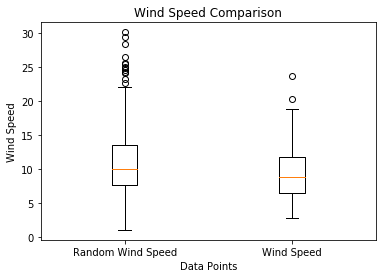

In [111]:
WindSpeedBoxPlot=[RandWindSpeed, WindSpeed]
plt.title("Wind Speed Comparison")
plt.boxplot(WindSpeedBoxPlot)
plt.xlabel('Data Points')
plt.ylabel('Wind Speed')
plt.xticks([1, 2], ['Random Wind Speed','Wind Speed'])
plt.show()

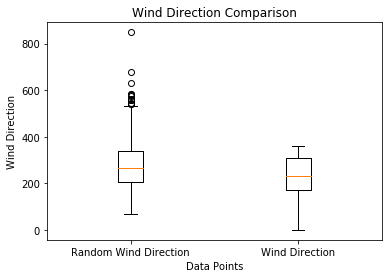

In [112]:
WindDirectionBoxPlot=[RandWindDir, WindDirection]
plt.title("Wind Direction Comparison")
plt.boxplot(WindDirectionBoxPlot)
plt.xlabel('Data Points')
plt.ylabel('Wind Direction')
plt.xticks([1, 2], ['Random Wind Direction','Wind Direction'])
plt.show()

**Box Plot Comparison Results**

As can be seen from the box plots the random data generated for the majority of the weather variables mimick the distribution of the Cork Airport weather data, except for Wind Direction. Possibly the incorrect distribution for generating the Wind Direction random data was selected and this would explain the differences in the random data generated. As can be seen from the box plot the random data is right skewed while the airport data is left skewed, which indicates opposing distributions.

**Generation of Scatter Plots**

To use PearsonR correlation analysis tool a fundamental requirement is that the data is linear. I will now generate scatter plots for each of the random data weather variables to graphically display the data sets.  

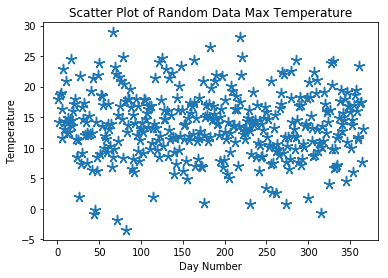

In [113]:
plt.scatter(DayNumber,RandMaxTemp, s=100, marker=(5, 2))
plt.title('Scatter Plot of Random Data Max Temperature')
plt.xlabel('Day Number')
plt.ylabel('Temperature')
plt.show()

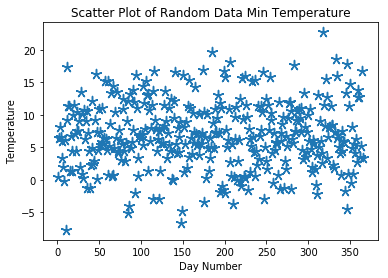

In [114]:
plt.scatter(DayNumber,RandMinTemp, s=100, marker=(5, 2))
plt.title('Scatter Plot of Random Data Min Temperature')
plt.xlabel('Day Number')
plt.ylabel('Temperature')
plt.show()

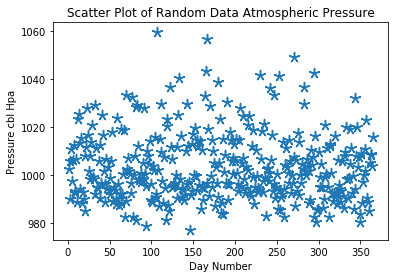

In [115]:
plt.scatter(DayNumber,RandPressure, s=100, marker=(5, 2))
plt.title('Scatter Plot of Random Data Atmospheric Pressure')
plt.xlabel('Day Number')
plt.ylabel('Pressure cbl Hpa')
plt.show()

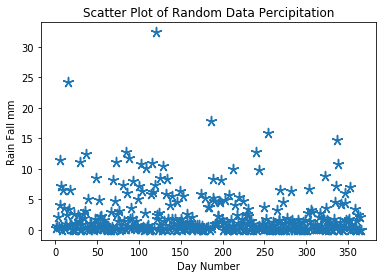

In [116]:
plt.scatter(DayNumber,RandRain, s=100, marker=(5, 2))
plt.title('Scatter Plot of Random Data Percipitation')
plt.xlabel('Day Number')
plt.ylabel('Rain Fall mm')
plt.show()

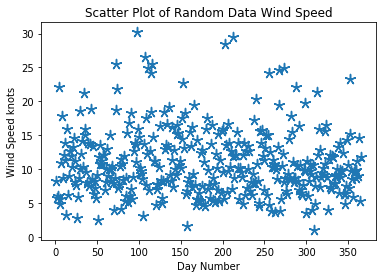

In [117]:
plt.scatter(DayNumber,RandWindSpeed, s=100, marker=(5, 2))
plt.title('Scatter Plot of Random Data Wind Speed')
plt.xlabel('Day Number')
plt.ylabel('Wind Speed knots')
plt.show()

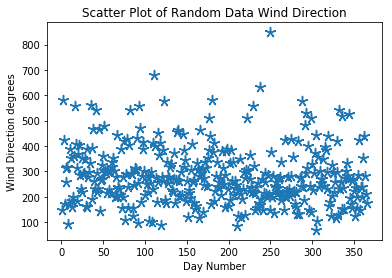

In [118]:
plt.scatter(DayNumber,RandWindDir, s=100, marker=(5, 2))
plt.title('Scatter Plot of Random Data Wind Direction')
plt.xlabel('Day Number')
plt.ylabel('Wind Direction degrees')
plt.show()

** Correlation Analysis of Weather Variables**

The statistical evaluation of the relationship between two numerical continuous variables is called Correlation Analysis. Every day examples would be a persons height to weight ratio and a persons exam results in relation to study time.

For the purpose of this project, below, we are going to perform correlation analysis on the following variables against rain fall to see if there is a relationship between the amount of rain fallen and any of the other weather variables. 

- Maximum Air Temperature (C)
- Minimum Air Temperature (C)
- Mean Wind Speed (Knot)
- Mean CBL Pressure (hpa) 

There is a number of different commands that could be used to determine if a correlation exists between rain fall and any of the other variables. These include;

- np.corrcoef
- stats.pearsonr

The correlation coefficient can range in value from -1 to 1. The larger the coefficient value the stronger the relationship between the variables. A perfect linear correlation is indicated by an absolute value of 1. The sign of the coefficient correlation value indicates the direction of the relationship. A positive value indicates both variables tend to increase or decrease together. If one variable increases and the other decreases a negative correlation coefficient is produced.

For the purpose of this project the stats.pearsonr command will be utilised. There are a number of assumptions that need to be met before the Pearsons correlation method can be used but for the purpose of the project each varialbe will be analysed using the Pearson method.

The correlation coefficient result is outputted in the following for;

(x,y)

where x if the correlation coefficient and y is the p-value.

The significance of the p-value is important. The p-value indicates if the correlation coefficient is significantly different from 0. 

A coefficient of 0 indicates no linear relationship.

If the p-value is less than or equal to the specified alpha level (0.05) it can be concluded that the correlation is significantly different from 0. If the p-value is greater than the alpha level it cannot be concluded that the correlation is significant from 0.


** Rain vs Pressure **

In [119]:
stats.pearsonr(RandRain, RandPressure)

(-0.016540622109085641, 0.75280283627090694)

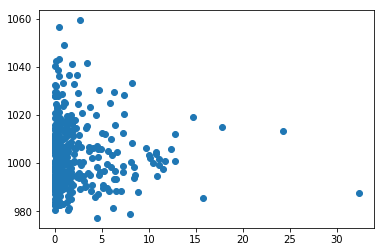

In [120]:
plt.scatter(RandRain, RandPressure)
plt.show()

**Analysis Interpretation**

The first value listed -0.01470844785549032 is the Pearson Coefficient number and the second value is the p-value. As the pearson number is close to zero indicates there is no correlation between rain fall and pressure. As the p-value is greater than 0.05 it cannot be concluded that the correlation is different from 0.

**Rain vs Maximum Temperature**

In [121]:
stats.pearsonr(RandRain, RandMaxTemp)

(0.084000053980082187, 0.10912314652731617)

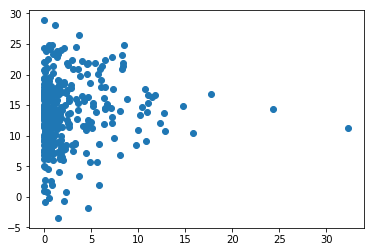

In [122]:
plt.scatter(RandRain, RandMaxTemp)
plt.show()

**Analysis Interpretation**

The first value listed 0.010665510151414662 is the Pearson Coefficient number and the second value is the p-value. As the pearson number is close to zero indicates there is no correlation between rain fall and maximum temperature. As the p-value is greater than 0.05 it cannot be concluded that the correlation is different from 0.

** Rain vs Minimum Temperature**

In [123]:
stats.pearsonr(RandRain, RandMinTemp)

(-0.056038148324620757, 0.28562233235340501)

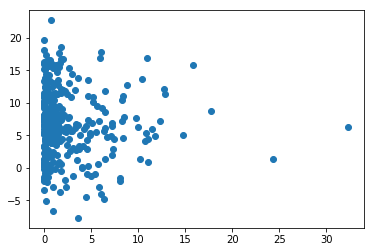

In [124]:
plt.scatter(RandRain, RandMinTemp)
plt.show()

**Analysis Interpretation**

The first value listed 0.046385372686542081 is the Pearson Coefficient number and the second value is the p-value. As the pearson number is close to zero indicates there is no correlation between rain fall and minimum temperature. As the p-value is greater than 0.05 it cannot be concluded that the correlation is different from 0.

** Rain vs Wind Speed **

In [125]:
stats.pearsonr(RandRain, RandWindSpeed)

(0.073666037166579212, 0.1601792083559232)

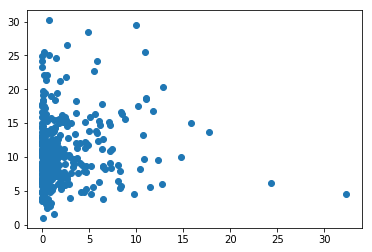

In [126]:
plt.scatter(RandRain, RandWindSpeed)
plt.show()

**Analysis Interpretation**

The first value listed -0.061915179999620665 is the Pearson Coefficient number and the second value is the p-value. As the pearson number is close to zero indicates there is no correlation between rain fall and wind speed. As the p-value is greater than 0.05 it cannot be concluded that the correlation is different from 0.

** Conclusion**

As can be seen from the analysis there was no correlation between the amount of rain fall and any of the other weather variables analysed. On review of the results it has been noted that generating random data for weather variables was probably not the most appropriate data set to select due to the variation that can be inherently normal within weather i.e. abnormally warm days in winter, wetter summers than winter and thunder showers with high pressure.

Also it is has been noted that some of the selected distributions were not the most appropriate distributions to be selected for generating the random data sets i.e. literature notes a number of suitable distributions for rain fall as well as other variables being left / right screwed when reviewing the real world data, the distributions exhibited the opposite skew.

It is hoped that the tools and techniques utilised within this project notebook gives enough evidence of the understanding of the tools, techniques and libraries that can be utilised to generate random data and perform an accurate analysis of sai data.

